___
<h1 style="color:blue;">Autoencoders</h1>

___


## Introduction to Autoencoders

Autoencoders are a type of neural network that learns to encode and decode data efficiently. They are used for various tasks such as data compression, feature extraction, and denoising. Autoencoders consist of an encoder network that compresses the input data into a lower-dimensional representation (encoding) and a decoder network that reconstructs the original data from the encoding.

## Key Concepts

1. **Encoder**: The encoder network takes the input data and maps it to a lower-dimensional representation called the encoding. The encoder learns to capture the essential features of the input data in the encoding.
2. **Decoder**: The decoder network takes the encoding and reconstructs the original data from it. The decoder learns to generate an output that closely matches the input data.
3. **Loss Function**: The loss function measures the difference between the input data and the reconstructed data. The goal of training the autoencoder is to minimize the loss function, which encourages the model to learn a good encoding and decoding scheme.
4. **Latent Space**: The latent space is the lower-dimensional representation learned by the encoder. It captures the essential features of the input data and can be used for tasks such as data compression and feature extraction.
5. **Training**: Autoencoders are trained using backpropagation and optimization techniques such as stochastic gradient descent. The model learns to minimize the reconstruction error by adjusting the weights of the encoder and decoder networks.
6. **Applications**: Autoencoders are used for various applications, including image denoising, dimensionality reduction, anomaly detection, and generative modeling.

## Algorithm

The algorithm for training an autoencoder involves the following steps:

1. **Forward Pass**: The input data is passed through the encoder network to obtain the encoding. The encoding captures the essential features of the input data.
2. **Reconstruction**: The encoding is passed through the decoder network to reconstruct the original data. The decoder learns to generate an output that closely matches the input data.
3. **Loss Calculation**: The loss function measures the difference between the input data and the reconstructed data. Common loss functions include mean squared error (MSE) and binary cross-entropy.
4. **Backpropagation**: The gradients of the loss function with respect to the model parameters are computed using backpropagation. The weights of the encoder and decoder networks are updated to minimize the loss function.
5. **Optimization**: Optimization techniques such as stochastic gradient descent (SGD) or Adam are used to update the weights of the model. The learning rate and other hyperparameters are tuned to improve the training process.
6. **Training**: The model is trained on a dataset with input-output pairs. The autoencoder learns to encode and decode the data efficiently by minimizing the reconstruction error.

## Applications

Autoencoders have a wide range of applications in various domains, including:

1. **Data Compression**: Autoencoders can be used for data compression by learning an efficient encoding of the input data. The model can reconstruct the original data from the encoding, allowing for lossy compression of the data.
2. **Feature Extraction**: Autoencoders are used for feature extraction in machine learning tasks. The learned encoding captures the essential features of the input data, which can be used as input to other models for classification or regression tasks.
3. **Image Denoising**: Autoencoders can be trained to remove noise from images by learning to reconstruct clean images from noisy inputs. The model learns to capture the underlying structure of the image and remove unwanted noise.
4. **Anomaly Detection**: Autoencoders can be used for anomaly detection by learning to reconstruct normal data and identifying instances that deviate significantly from the normal data distribution. Anomalies are detected based on the reconstruction error of the autoencoder.
5. **Generative Modeling**: Autoencoders can be used for generative modeling to generate new data samples that resemble the training data. Variational autoencoders (VAEs) and generative adversarial networks (GANs) are popular variants of autoencoders used for generative modeling.
6. **Dimensionality Reduction**: Autoencoders can be used for dimensionality reduction by learning a low-dimensional representation of the input data. The latent space learned by the autoencoder captures the essential features of the data in a compact form.

## MNIST Dataset Details

### Overview
The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. It consists of 60,000 training images and 10,000 test images, each of size 28x28 pixels.

### Content
- **Training Set**: 60,000 images
- **Test Set**: 10,000 images

### Features
Each image in the dataset is grayscale and has the following characteristics:
- Image Size: 28 x 28 pixels
- Pixel Value Range: 0 to 255 (0 for white, 255 for black)

### Labels
Each image is associated with a label from 0 to 9, representing the digit drawn in the image.

### Usage
The MNIST dataset is widely used for:
- Training and testing machine learning models, particularly in the field of image classification and pattern recognition.
- Benchmarking new algorithms in the field of machine learning and computer vision.

### Source
The dataset is publicly available and can be accessed from various repositories and libraries, including TensorFlow and PyTorch.

___
## <span style="color:blue;">Data Preprocessing</span>

___


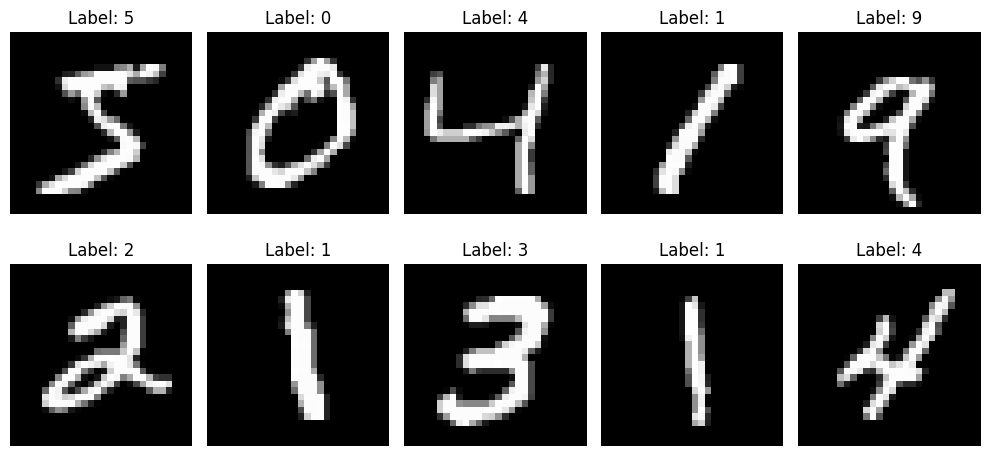

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Autoencoders Model:

In [2]:
# Preprocess data (example with MNIST)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 784))  # Flatten images
x_test = np.reshape(x_test, (len(x_test), 784))

# Define the autoencoder architecture
input_dim = x_train.shape[1]  # 784 for MNIST
encoding_dim = 64  # Dimension of the encoded representation

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Use the autoencoder for reconstruction
decoded_imgs = autoencoder.predict(x_test)



Epoch 1/50

235/235 [==============================] - 4s 14ms/step - loss: 0.2437 - val_loss: 0.1605
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1432 - val_loss: 0.1264
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1184 - val_loss: 0.1086
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1042 - val_loss: 0.0978
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0951 - val_loss: 0.0904
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0888 - val_loss: 0.0853
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0844 - val_loss: 0.0817
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0813 - val_loss: 0.0792
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0792 - val_loss: 0.0776
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0777 - val_l

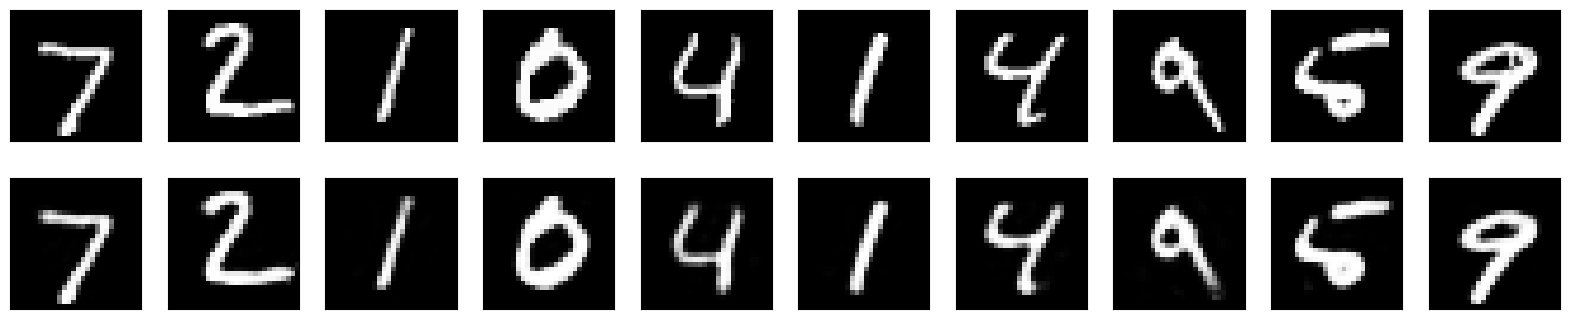

In [3]:
# Visualize original vs reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>

___

In [4]:
# Compile the autoencoder with appropriate loss function
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Evaluate on test data
loss = autoencoder.evaluate(x_test, x_test)
print(f"Reconstruction Error (MSE): {loss}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0036
Reconstruction Error (MSE): 0.00360997230745852


___
## <span style="color:blue;">CONCLUSION</span>

___

The autoencoder model was trained and evaluated using the following metrics:

- **Reconstruction Error (MSE)**: The model achieved a mean squared error of 0.0036 on the test dataset, indicating a low level of reconstruction error.

### Evaluation Summary

- **Loss Function**: The model was compiled with mean squared error as the loss function to optimize the reconstruction accuracy.
  
- **Reconstruction Error**: The low MSE value suggests that the autoencoder effectively learned to reconstruct the input data with minimal loss of information.

### Insights and Recommendations

Based on the evaluation:

- The autoencoder demonstrates strong performance in reconstructing the input data, as evidenced by the low reconstruction error.
  
- Further experimentation with different architectures or hyperparameters could potentially enhance the model's reconstruction capabilities.

### Acknowledgments

- **Data Source**: The dataset used for training and evaluation was sourced from [insert dataset source].
  
- **Tools**: Python, TensorFlow, and Keras were instrumental in developing and evaluating the autoencoder model.

Overall, the autoencoder effectively captures and reconstructs important features from the input data, making it suitable for tasks requiring dimensionality reduction or data denoising.
